# Ziqi Zhang 1001374684

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from numpy.linalg import svd

In [0]:
# import data
data = load_breast_cancer()
df = pd.DataFrame(data = data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
print('Size of the matrix: ({0}, {1})'.format(len(df.index), len(df.columns)))

Size of the matrix: (569, 30)


# **Problem 1**


### 1. PCA

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
def PCA(input_data,num_comp):
  # standarize
  data_stand = StandardScaler().fit_transform(input_data.data)
  # calculate eigenvectors
  u,s,vh = np.linalg.svd(data_stand.T)
  return u.T[0:num_comp], data_stand

In [0]:
eigenVectors, data_std = PCA(data,2)

In [0]:
# multiply the original dataset with eigenvector
product = np.dot(data_std, eigenVectors.T)

### 2.
Two pre-processing steps used are:  
- Shift mean to 0  
- Range normalize to 1


### 3. Plot in 2-D

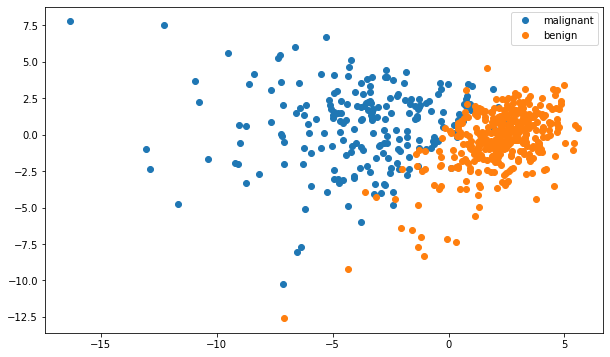

In [0]:
labels = set(data['target'])
label_dict={
    0:'malignant',
    1:'benign'
}

plt.figure(figsize=(10,6))
for i in labels:
  plt.plot(product[data.target==i,0], product[data.target==i,1], 'o', label=label_dict[i])

plt.legend(['malignant', 'benign'])
plt.show()

# **Problem 2**

### 1. Implement k-Means

In [0]:
# This function returns the distance between two points
def distance(point1, point2):
  point1 = np.array(point1)
  point2 = np.array(point2)
  dist = np.sqrt(np.sum(np.power(point1-point2, 2)))
  return dist

def k_means(input_data, k, max_iter):
  # generate k centroid as starting points
  centroid = []
  for i in range(k):
    # centroid.append(np.random.uniform(np.min(input_data),np.max(input_data),len(input_data[0])))
    centroid.append(input_data[i])
  for _ in range(max_iter):  # iteration
    sum_dist = 0
    # calculate distance of each point to each centroid and assign class
    point_class = np.zeros(len(input_data),dtype=np.int)
    for i in range(len(input_data)):
      min_dist = np.Inf
      for j in range(k):
        point_dist = distance(centroid[j],input_data[i])
        if point_dist < min_dist:
          min_dist = point_dist
          point_min = j
      sum_dist = sum_dist + min_dist**2  # calculate distortion
      point_class[i] = point_min
    # update centroid positions
    for i in range(len(centroid)):
      centroid[i] = np.mean(input_data[point_class==i], axis=0)
  print('-----finished ', k)
  print(sum_dist)

  return centroid, point_class, sum_dist

In [0]:
data_stand = StandardScaler().fit_transform(data.data)
a,b,c = k_means(data_stand,2,1000)
print('Final Centroid:', a)

-----finished  2
11595.683312822128
Final Centroid: [array([0.98649786, 0.49202131, 1.01866689, 0.97479724, 0.5871176 ,
       1.014073  , 1.14492245, 1.17028266, 0.60339021, 0.22927434,
       0.86311672, 0.04416341, 0.86446528, 0.8137762 , 0.01228944,
       0.69281919, 0.63976499, 0.77166695, 0.13798752, 0.40384985,
       1.05221312, 0.51705679, 1.07769473, 1.01391704, 0.59804381,
       0.95285513, 1.05144274, 1.15328841, 0.5994129 , 0.61362004]), array([-0.48677585, -0.24278217, -0.50264928, -0.48100231, -0.28970632,
       -0.50038248, -0.56494861, -0.57746231, -0.29773585, -0.11313275,
       -0.42589487, -0.02179192, -0.4265603 , -0.40154836, -0.00606408,
       -0.34186354, -0.31568456, -0.38077004, -0.06808833, -0.19927499,
       -0.51920227, -0.25513563, -0.53177588, -0.50030552, -0.29509774,
       -0.47017523, -0.51882214, -0.56907669, -0.29577329, -0.30278364])]


### 2. Plot Distortion

In [0]:
# calculate distortion
dist = []
for i in range(2,8):
  a,b,c = k_means(data_stand,i,1000)
  dist.append(c)

-----finished  2
11595.683312822128
-----finished  3
10061.797818243695
-----finished  4
9266.154235789782
-----finished  5
8562.873570667625
-----finished  6
8332.237809586446
-----finished  7
7690.390940644321


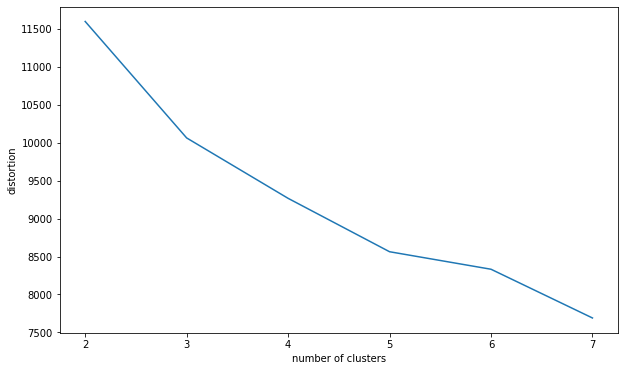

In [0]:
# plot distortion
plt.figure(figsize=(10,6))
plt.plot(np.arange(2,8),dist)
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### 3. 
The slope of the distortion vs. number of clusters plot decreases at 3, therefore, the optimal number of clusters is 3. 

### 4. PCA


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# standardize
data_stand = StandardScaler().fit_transform(data.data)
a,b,c = k_means(data_stand,3,1000)
print('Final Centroid:', a)

-----finished  3
10061.797818243695
Final Centroid: [array([ 1.61908207,  0.62661289,  1.6240009 ,  1.66315361,  0.39856469,
        0.93061442,  1.23933718,  1.48697008,  0.43217049, -0.2869193 ,
        1.44128466,  0.0938201 ,  1.40538059,  1.42350487, -0.07267167,
        0.47907229,  0.43975291,  0.78783453,  0.05442714,  0.11903767,
        1.66674915,  0.54289966,  1.65684176,  1.68494744,  0.33688865,
        0.67029147,  0.88661143,  1.27318238,  0.30034644,  0.08406585]), array([-0.44809508, -0.2418554 , -0.46954224, -0.44831604, -0.358676  ,
       -0.57356749, -0.59729151, -0.59473375, -0.34211158, -0.24188587,
       -0.41793414, -0.03526589, -0.42565126, -0.38816111, -0.10019852,
       -0.44614655, -0.38279548, -0.45090772, -0.09646964, -0.32238413,
       -0.48612661, -0.25310785, -0.50571337, -0.47269217, -0.37318328,
       -0.534009  , -0.56276526, -0.59707489, -0.31763162, -0.41144444]), array([-0.17232895,  0.17898672, -0.10074437, -0.22001438,  0.84922567,
       

In [0]:
def PCA(input_data,num_comp):
  # standarize
  data_stand = StandardScaler().fit_transform(input_data)
  # calculate eigenvectors
  u,s,vh = np.linalg.svd(data_stand.T)
  return u.T[0:num_comp], data_stand

In [0]:
eigenVectors_cl, data_std_cl = PCA(data.data,2)
product_cl = np.dot(data_std_cl, eigenVectors.T)
eigenVectors_cen, data_std_cen = PCA(a,2)
product_cen = np.dot(data_std_cen, eigenVectors.T)

### 5. Plot

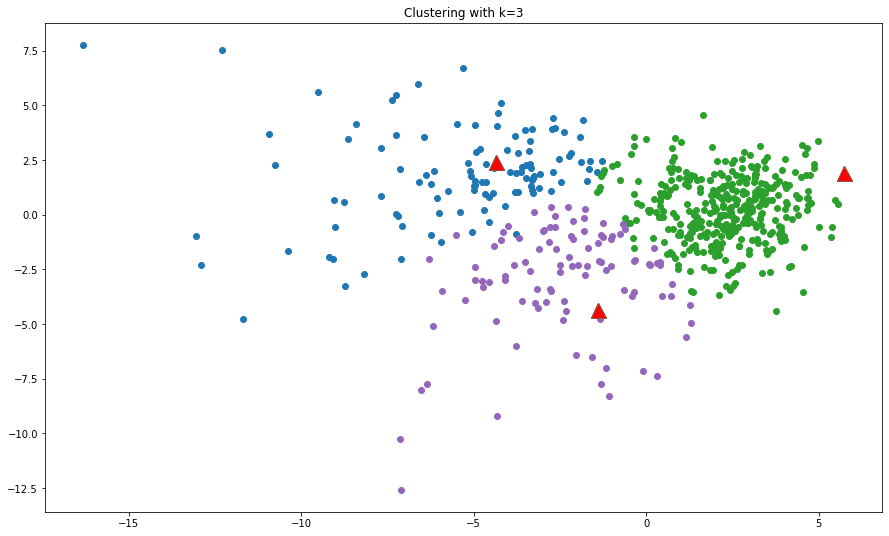

In [0]:
labels = set(b)
label_dict={
    0:'cluster 0',
    1:'cluster 1',
    2:'cluster 2'
}

plt.figure(figsize=(15,9))
for i in labels:
  plt.title('Clustering with k=3')
  fig1 = plt.plot(product_cl[b==i,0], product_cl[b==i,1], 'o', label=label_dict[i])
  fig2 = plt.plot(product_cen[:,0], product_cen[:,1], '^', markersize = 15, markerfacecolor = 'red')
  
plt.show()

# **Problem 3**

### 1. 
The proposed train/test split is 7:3.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# use standardized input
X, X_test, Y, Y_test = train_test_split(StandardScaler().fit_transform(data.data), data.target, test_size=0.3, random_state=1)

### 2.
Linear regression doesn't need validation set because there is no hyper-parameter to tune. 

### 3.
![alt text](https://drive.google.com/uc?id=1EfzGQfNK7x4GUPUJyeaIwdgxI37EtJG1)


### 4.

In [0]:
w = np.dot(np.linalg.inv((np.dot(np.transpose(X),X))),np.dot(np.transpose(X),Y))
w

array([ 1.95425420e+00,  2.09906859e-01, -2.27203240e+00,  2.09955229e-01,
       -2.56269799e-02,  1.84796111e-01,  1.59261326e-02, -1.10688634e-01,
        1.69004544e-02,  5.74309003e-02, -9.30339155e-02,  7.49832513e-02,
       -1.48450262e-02,  6.68130511e-02, -1.15640648e-01,  5.65366705e-02,
        7.79388024e-02, -8.47106355e-02, -9.68848731e-02,  7.94042350e-02,
       -9.36255100e-01, -3.10648736e-01,  3.99038183e-01,  4.11419229e-01,
        1.06590092e-01,  1.87777366e-01, -2.64510389e-01, -1.78327628e-03,
       -7.06344584e-02, -2.30309350e-01])

### 5.

In [0]:
def predict_lin(X,Y):
  # predict
  g = np.dot(X,w)
  # sigmoid
  g_sig = 1/(1 + np.exp(-g)) 
  # condition check
  result = []
  for i in range(len(g_sig)):
    if g_sig[i] >= 0.5:
      result.append(1)
    else:
      result.append(0)
  # report accuracy
  correct = 0
  for i in range(len(Y)):
    if Y[i] == result[i]:
      correct = correct + 1
  acc = correct/len(Y)
  return acc,result

print('Train Set Accuracy:', predict_lin(X,Y)[0])
print('Test Set Accuracy:', predict_lin(X_test,Y_test)[0])

Train Set Accuracy: 0.9673366834170855
Test Set Accuracy: 0.8947368421052632


### 6.

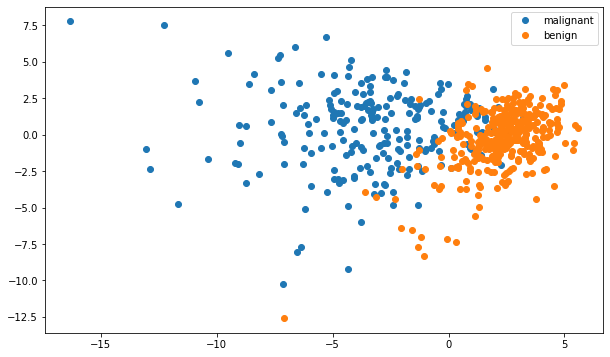

In [0]:
# make prediction on the entire dataset
data_stand = StandardScaler().fit_transform(data.data)
pred = predict_lin(data_stand,data.target)[1]

# plot
labels = set(data['target'])
label_dict={
    0:'malignant',
    1:'benign'
}

plt.figure(figsize=(10,6))
for i in labels:
  plt.plot(product[pred==i,0], product[pred==i,1], 'o', label=label_dict[i])

plt.legend(['malignant', 'benign'])
plt.show()

# **Problem 4**

### 1.
It is not necessary to fine tune the learning rate since the second moment will balance the step size automatically. If the step size is too large, the second moment will increase and the step size will decrease. If the step size is too small, the second moment will decrease and the step size will increase.

### 2.
Mini-batch should be used since SGD does not provide optimal performance, while batch GD will result in OOM (out of memory). The number of data passed per mini-batch should be the maximum amount of data that does not cause OOM.

### 3.
Mini-batch should be used. The mini-batch size should utilize the entire memory of each GPU. The mean of the the syncronized output gradient from each GPU should be calculated to update the parameter. 

# **Problem 5**


### 1.
The training process has several issues:  
1. For MNIST dataset, single hidden layer with five neurons is not sufficient.  
2. Momentum should not be set to 0  
3. Three hyper-parameters are tuned seperately with different dataset. Optimal performance is not guaranteed. The proper way is to grid-search on the entire training dataset and find the optimal combination of hyper-parameters.  
4. Cross-validation is suggested to prevent over-fitting

### 2.
Confusion matrix is preferable since it presents the bias of the prediction. For example, when classifying a group of 80 female and 20 male, the algorithm is extremely bad that predict everything as female. By looking at the accuracy, the result can be as high as 80%. However, when looking at the confusion matrix, we can tell that the algorithm actually perform badly.

### 3.


In [0]:
# the following function returns the bias. True label Y and predicted label 'prediction' are passed in to the function.
def get_bias(Y,prediction):
  bias = abs(np.mean(prediction) - np.mean(Y))
  return bias

# the following function returns the variance. The predicted label 'prediction' is passed in to the function
def get_var(prediction):
  var = np.mean((prediction - np.mean(prediction))**2)
  return var